# SciPy 1 : Curve Fitting

When you have some data, you shouldn't just sit on it and do nothing. You try to make sense of it. How do you do that? You make a model that explains your data and then you go on to take even more data, only this time, you predict the results using your model. But here's the thing about models, there are almost always undetermined quantities present. G in Newton's law on Gravitation, the Planck's constant in Black Body Spectrum, Avogadro's Number, these were all just constants in theories. They all were determined experimentally, and the predictions made helped convert these theories into laws of physics.

Say you have some data, and you are thinking, "Oh, looks like this could be approximated by an exponential function." What should you do? You should try to fit an exponential function to your data, find out the parameters of your model and see for yourself if your model is good enough. If the model doesn't fit the data, try another model. Once you are satisfied, you now have a theory.

The optimize.curve_fit function of SciPy lets you do exactly that. Let us see how:

In [1]:
%matplotlib inline

In [2]:
# import all the important packages

import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt

We'll first try to fit a linear function to the data that we will generate:

In [3]:
# Step 1: Define your model as a callable function with the first argument as observation points/inputs and
#         consequent arguments as the parameters of your model. The output of this function should be your
#         model's predictions

def lin_func(x,m,c):
    return m*x + c

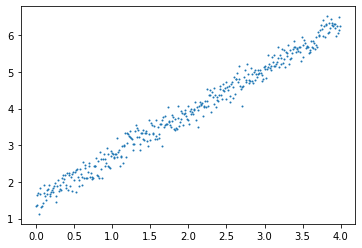

In [4]:
# Let's generate our own data. This is not Step 2 because you will be getting your data from an experiment

xdata = np.arange(0,4,0.01)
ydata = lin_func(xdata,1.2,1.5) + 0.2 * np.random.randn(len(xdata))
plt.scatter(xdata,ydata,s=1)

In [5]:
# Step 2: Now we need to get the best fit parameters and the respective errors using curve_fit

p_opt, p_cov = cf(lin_func,xdata,ydata)
# p_opt is the array that contains optimized values of the parameters, whereas p_cov is the covariance matrix.

[[ 6.96996324e-05 -1.39050766e-04]
 [-1.39050766e-04  3.70338535e-04]]


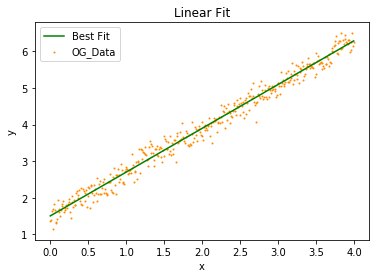

In [6]:
# Now plot the best fit along with the original data to see if we have a good match

plt.plot(xdata,lin_func(xdata,*p_opt),label='Best Fit',color='g')
# * before a separable object unpacks it. So you don't need to write lin_func(xdata,p_opt[0],p_opt[1]). The *
# does it for you.
plt.scatter(xdata,ydata,label='OG_Data',s=1,color='darkorange')
# Yes, you can have scatter plot and a normal plot in one
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit')
plt.legend()

print(p_cov)

Seems like a good fit. What about 'p_cov', the covariance matrix? Find more about it [here](https://en.wikipedia.org/wiki/Covariance_matrix). The diagonals of the covariance matrix provide the variance of the parameters of our model. Therefore the standard deviation (aka error) of the parameters is given by the square root of the variances.

How is this best fit calculated any way? What criteria are we using to say that this is the best fit? You always start with an initial point and calculate the sum of the squared residuals of {f(xdata,p_opt)-ydata}, f being the model function. The program then iterates over the parametrs to get a local minima. If the data is not too complex, there should only be one minima, and therefore the initial points of these iterations won't matter. If the data is complex, it could lead to multiple local minima's and the initial values of the parameters will decide at which minima the iterations will converge.

What should you do if the data is not linear? You can always try to bring it in a linear form by manipulating the data. For example, if you think the data follows a exponential function:
$$ y = ae^{bx}, $$
you can take log on both sides and you get a linear relation between $log(y)$ and $x$:
$$ log(y) = bx + log(a) $$

Let us take an example where you cannot modify the data to form a linear relation. The simplest example is a quadratic function.

In [7]:
# Define a new function
def quad_func(x,a,b,c):
    return a*x**2. + b*x + c

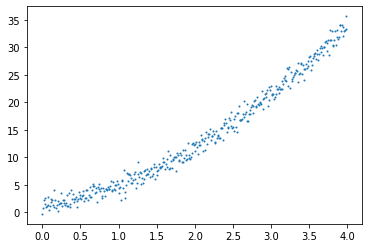

In [8]:
ydata = quad_func(xdata,1.5,2.3,1.2) + np.random.randn(len(xdata))

plt.scatter(xdata,ydata,s=1)

[1.48795952 2.28912161 1.22882984]


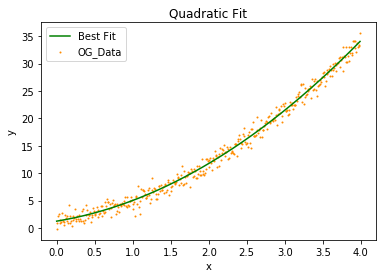

In [9]:
p_opt, p_cov = cf(quad_func,xdata,ydata)

plt.plot(xdata,quad_func(xdata,*p_opt),label='Best Fit',color='g')
plt.scatter(xdata,ydata,label='OG_Data',s=1,color='darkorange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Fit')
plt.legend()

print(p_opt)

In [10]:
# compare the original parameters with the estimated ones
print('a_err={}, b_err={}, c_err={}'.format(*(abs(p_opt-[1.5,2.3,1.2]))))

# The 'format' function replaces the curly brackets with the arguments provided to it. For example 
# print('a={}, b={}'.format(1,2)) will print 'a=1,b=2'.

a_err=0.012040475048944899, b_err=0.01087838922227835, c_err=0.02882984467495997


Now you are equipped to fit any function to a dataset using the curve_fit function.

## Your assignment ...
Should you chose to accept it ...

### Problem 1:
For this, you'll need your results from Tutorial 4 which was on plotting. If you got your results correct, you should see a monotonically increasing function. According to General Relativity, we know that the frequency-time relationship is a power law. It is given by:

$$ f_{GW}^{-8/3}(t) = \frac{(8\pi)^{8/3}}{5}\Big(\frac{G\mathcal{M}}{c^{3}}\Big)^{5/3}(t_{c}-t) $$

Where $f_{GW}$ is the frequency of Gravitational Waves, $\mathcal{M}$ is the [chirp mass](https://en.wikipedia.org/wiki/Chirp_mass) of the Binary system and $t_{c}$ is the time of coalescence, the time with the t=0 mark in your data. Note that this equation is applicable only for $t<t_{c}$, as after this is the ringdown where the process is highly non-linear and it is not possible to predict the equation followed by the frequency.

You can find more about the event in this [paper](https://arxiv.org/pdf/1608.01940.pdf).

#### Your task ...
Your task is to take points with frequency higher than 50 Hz until $t_{c}$ and fit a curve to get the chirp mass of the system.


### Problem 2:
You'll need to recall what you did in Tutorial 5 which was on astropy. You were asked to plot a histogram based on the number of background counts. You should notice a very nice distribution, except maybe a few irregular peaks. The peaks don't have any astrophysical significance, but are most probably present because of some property of the CCD camera used to capture the image. So, for now we'll ignore them.

Here we are counting the number of photons incident on each pixel. The pixels where you don't see any stars should have photon count to be zero. But that is not true. There is always some background radiation.

Now here we are counting something, in this case, photons. And whenever you are counting something, it is bound to follow [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). Let it be no. of radioactive decays in a radioactive material, no. of patients coming into a hospital between 10 to 11 pm, or the number of laser photons hitting a mirror (uncertainity in this leads to what is known as [shot noise](https://en.wikipedia.org/wiki/Shot_noise)), they all follow poisson distribution. The background photon count is no different.

Now in the limit that we have infinite data, the poisson distribution becomes continuous, and in this limit the probability distribution is the [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution). In fact, the probability distribution of the mean of a [random variable](https://en.wikipedia.org/wiki/Random_variable) always converges to a gaussian. This is the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

Enough about the probability theory, let's get to your task. Your task is to fit a [Gaussian Function](https://en.wikipedia.org/wiki/Gaussian_function). If you want your data to resemble a probability distribution, you can just normalize it and then fit a Normal probability distribution function instead of just a Gaussian Function.

Problem 1:

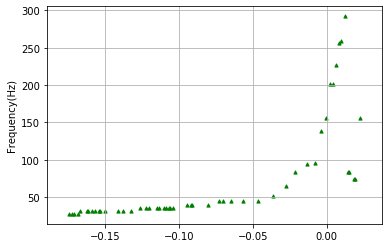

In [17]:
# Load data
data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')

zero_indices = np.where(np.diff(np.sign(data)))[0]

plt.scatter(time[zero_indices],freq[zero_indices],s=10, color='g', marker='^')
plt.ylabel('Frequency(Hz)')
plt.grid()

In [18]:
train_indices = []
for i in range(len(zero_indices)):
    if(time[zero_indices[i]]<=0 and freq[zero_indices[i]]>=50):
        train_indices.append(zero_indices[i])

In [19]:
print(train_indices)
print(freq[train_indices])
print(time[train_indices])

[567, 605, 630, 664, 685, 701, 715]
[ 50.92296645  65.51274888  83.60043298  94.43867361  95.20928469
 138.36708191 156.30545467]
[-0.03657236 -0.02729502 -0.0211915  -0.01289072 -0.00776377 -0.00385752
 -0.00043955]


In [20]:
def exp_law(x,a):
    return a*((-x)**(-3/8))
print(exp_law(time[train_indices],2))

[ 6.91588275  7.7178926   8.48631887 10.2252998  12.36667096 16.07550194
 36.29965084]


Here,
$$ a = \frac{1}{(8\pi)5^{-3/8}}\Big(\frac{G\mathcal{M}}{c^{3}}\Big)^{-5/8} $$



Hence,

$$ \mathcal{M} = \frac{c^3}{G} * (8a\pi)^{-8/5} * 5^{-3/5} $$

[11.53358267]


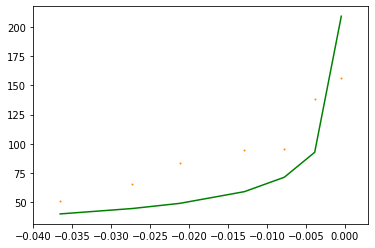

In [21]:
a_opt,a_cov = cf(exp_law,time[train_indices],freq[train_indices])

print(a_opt)

plt.scatter(time[train_indices],freq[train_indices],label='OG_Data',s=1,color='darkorange')
plt.plot(time[train_indices],exp_law(time[train_indices],*a_opt),label='Best Fit',color='g')

In [22]:
c = 3e8
G = 6.67408e-11
pi = np.pi

M = ((c**3)*((8*a_opt*pi)**(-8/5))*((5)**(-3/5)))/G
print(M)

[1.77036904e+31]


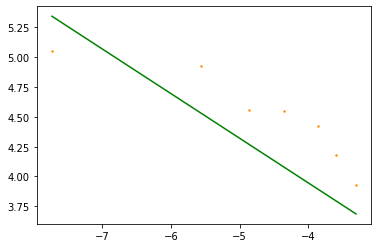

In [24]:
plt.scatter(np.log(abs(time[train_indices])),np.log(freq[train_indices]),s=2,label='OG_Data',color='darkorange')
plt.plot(np.log(abs(time[train_indices])),np.log(exp_law(time[train_indices],*a_opt)),label='Best Fit',color='g')